#EDA(EXPLORATORY DATA ANALYSIS) AND PREPROCESSING

In [104]:
#Calling all libraries at once
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [105]:
# Load the dataset
DiabetesDataSurvey = pd.read_csv('/content/drive/MyDrive/Project 2/diabetes_data_upload_randomized.csv')

# Display basic information about the dataset
DiabetesDataSurvey.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 539 non-null    int64 
 1   Gender              539 non-null    object
 2   Polyuria            539 non-null    object
 3   Polydipsia          538 non-null    object
 4   sudden weight loss  538 non-null    object
 5   weakness            539 non-null    object
 6   Polyphagia          539 non-null    object
 7   Genital thrush      539 non-null    object
 8   visual blurring     538 non-null    object
 9   Itching             538 non-null    object
 10  Irritability        539 non-null    object
 11  delayed healing     537 non-null    object
 12  partial paresis     539 non-null    object
 13  muscle stiffness    539 non-null    object
 14  Alopecia            538 non-null    object
 15  Obesity             539 non-null    object
 16  class               539 no

Alopecia: This is the medical term for hair loss. Alopecia can be localized to the scalp or can affect the entire body. It can have many causes, including genetics (such as male or female pattern baldness), autoimmune diseases (such as alopecia areata), medications, or other health conditions.

Polyuria: This refers to excessive or an abnormally large production or passage of urine. This can be a symptom of several conditions, including diabetes mellitus, diabetes insipidus, or could be due to the intake of certain substances like caffeine or diuretics.

Polydipsia: This term is used to describe excessive thirst or excessive intake of fluids. It is often associated with polyuria and can be a symptom of underlying issues such as diabetes or may occur after activities that lead to dehydration.

Polyphagia: This is the medical term for excessive hunger or increased appetite. Polyphagia is another symptom that is often associated with diabetes, where despite the intake of more food, there's weight loss because the glucose isn't being used effectively by the body's cells.

Genital Thrush: This likely refers to a fungal infection caused by Candida, commonly known as "thrush" when it affects the mouth or genitals.

Text(0, 0.5, 'Count')

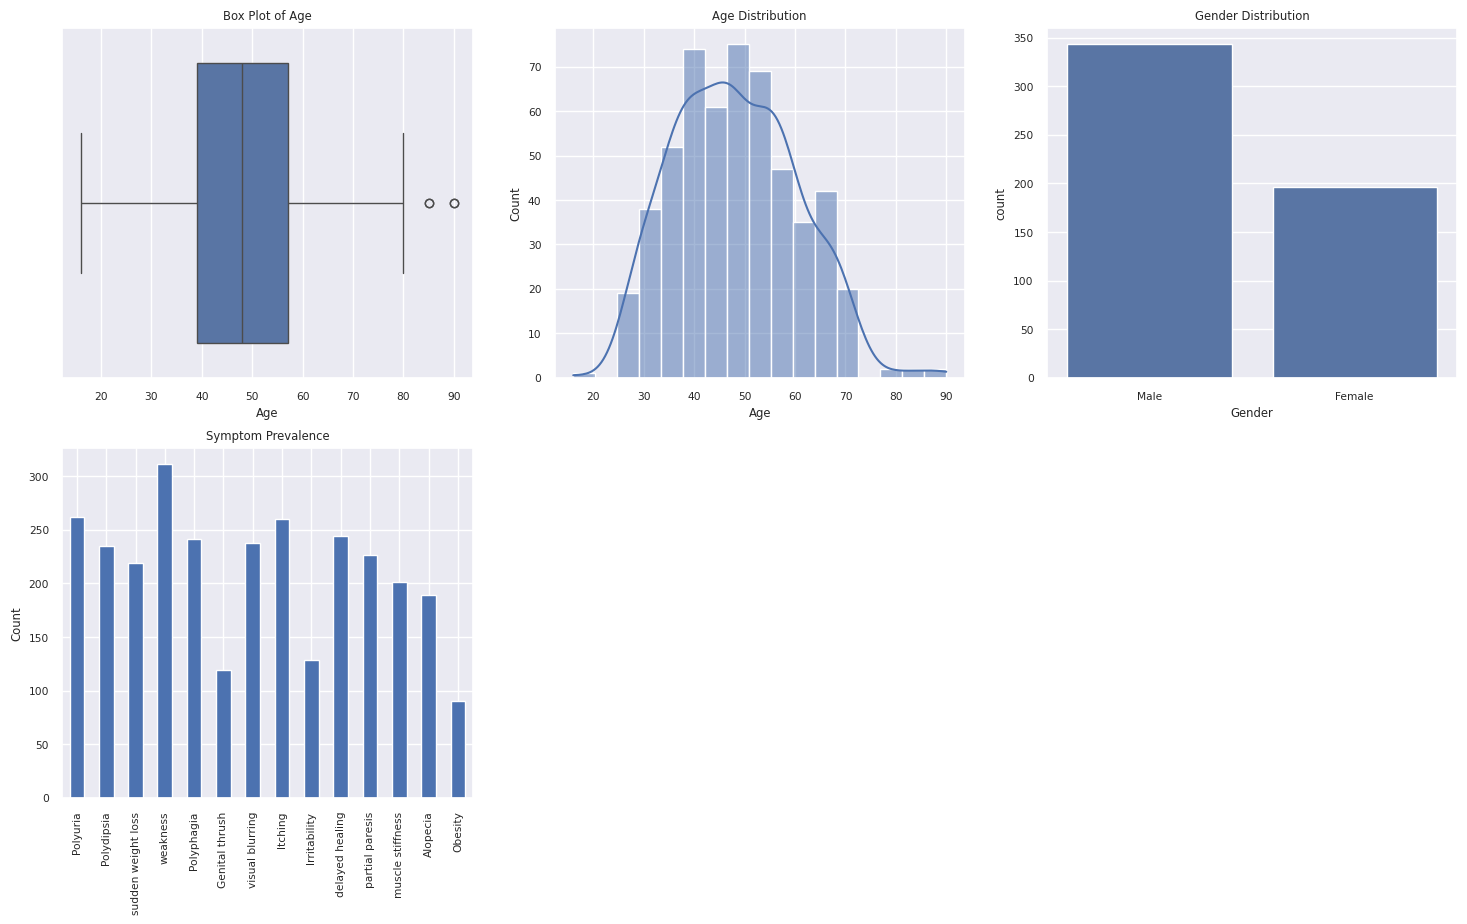

In [106]:
# First we set up the matplotlib figure
plt.figure(figsize=(18, 10))

# 1. Descriptive Statistics of Age
plt.subplot(2, 3, 1)
sns.boxplot(x=DiabetesDataSurvey['Age'])
plt.title('Box Plot of Age')

# 2. Age Distribution
plt.subplot(2, 3, 2)
sns.histplot(DiabetesDataSurvey['Age'], kde=True)
plt.title('Age Distribution')

# 3. Gender Distribution
plt.subplot(2, 3, 3)
sns.countplot(x=DiabetesDataSurvey['Gender'])
plt.title('Gender Distribution')

# 4. Symptom Prevalence
symptoms = ['Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia',
            'Genital thrush', 'visual blurring', 'Itching', 'Irritability', 'delayed healing',
            'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity']
symptom_counts = DiabetesDataSurvey[symptoms].apply(lambda x: x.value_counts()).T.loc[:, 'Yes']
plt.subplot(2, 3, 4)
symptom_counts.plot(kind='bar')
plt.title('Symptom Prevalence')
plt.ylabel('Count')

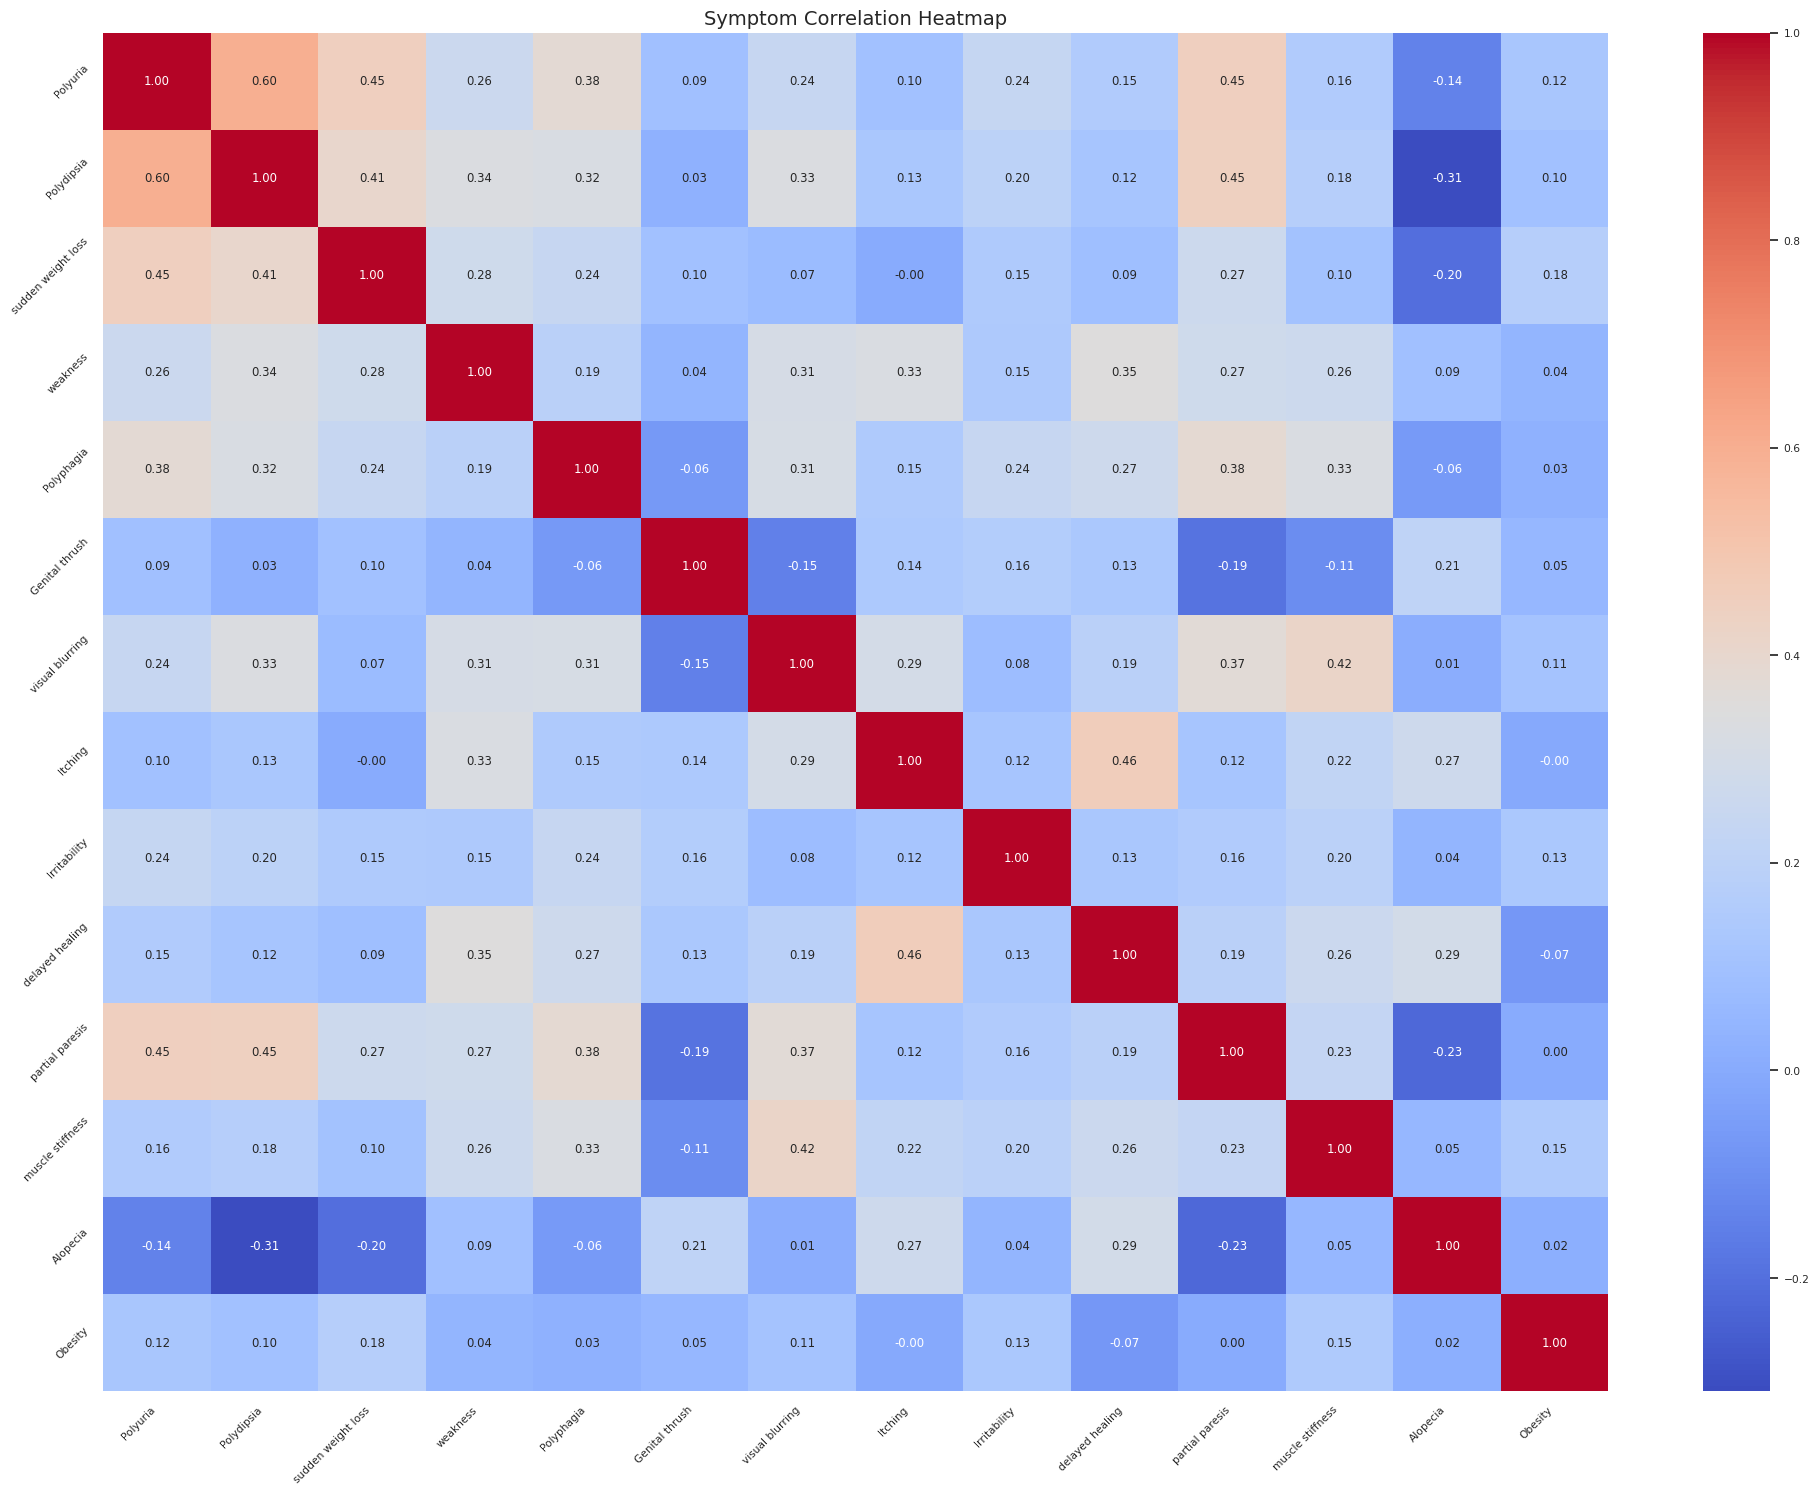

In [107]:
# 5. Correlation Analysis
# For correlation, converted categorical variables to numeric (Yes/No to 1/0)
DiabetesDataSurvey_numeric = DiabetesDataSurvey.copy()
DiabetesDataSurvey_numeric[symptoms] = DiabetesDataSurvey_numeric[symptoms].apply(lambda x: x.map({'Yes': 1, 'No': 0}))
# Calculate the correlation
correlation = DiabetesDataSurvey_numeric[symptoms].corr()

# Plotting the heatmap
plt.figure(figsize=(20, 15))
sns.set(font_scale=0.7)
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Symptom Correlation Heatmap', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

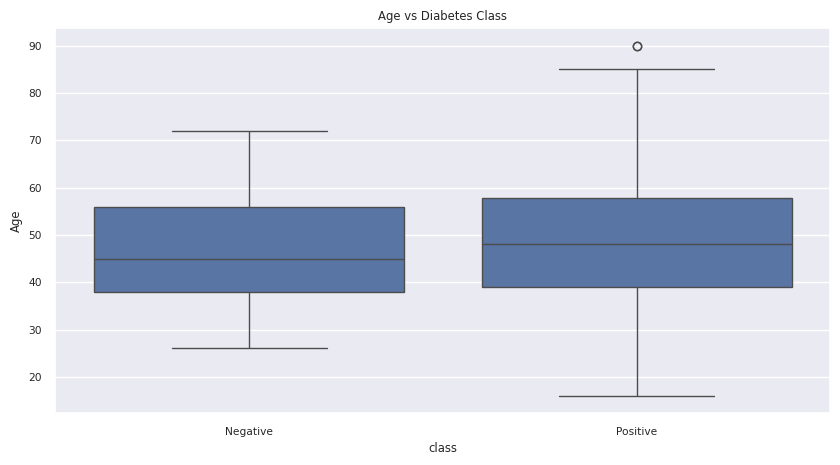

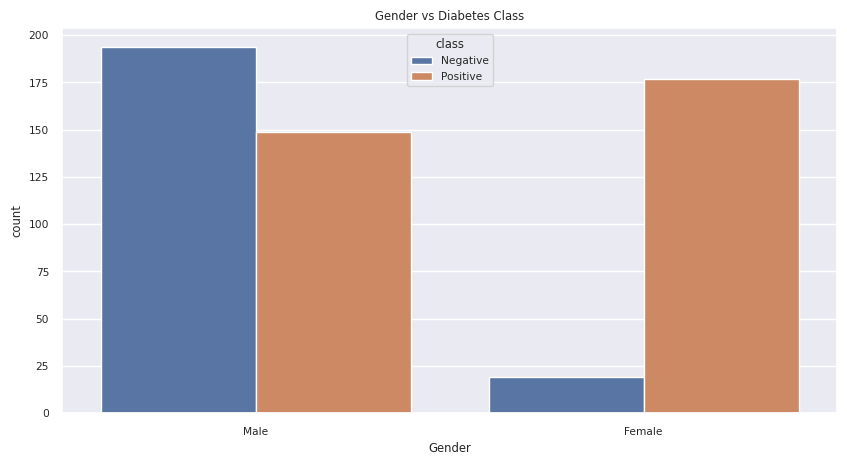

In [108]:
# Convert the class to a numeric value for easier analysis
DiabetesDataSurvey['class_numeric'] = DiabetesDataSurvey['class'].map({'Positive': 1, 'Negative': 0})

# Create a box plot for Age vs Diabetes Class
plt.figure(figsize=(10, 5))
sns.boxplot(x='class', y='Age', data=DiabetesDataSurvey)
plt.title('Age vs Diabetes Class')
plt.show()

# Create a count plot for Gender vs Diabetes Class
plt.figure(figsize=(10, 5))
sns.countplot(x='Gender', hue='class', data=DiabetesDataSurvey)
plt.title('Gender vs Diabetes Class')
plt.show()

In [109]:
# Check for missing values
missing_values = DiabetesDataSurvey.isnull().sum()

# Check for unique values in each column
unique_values = DiabetesDataSurvey.nunique()

# Typing mistakes will be checked using examining unique values in categorical columns
categorical_columns = DiabetesDataSurvey.select_dtypes(include=['object']).columns
unique_values_categorical = DiabetesDataSurvey[categorical_columns].apply(lambda x: x.unique())

# Display the findings
missing_values, unique_values, unique_values_categorical.T


(Age                   0
 Gender                0
 Polyuria              0
 Polydipsia            1
 sudden weight loss    1
 weakness              0
 Polyphagia            0
 Genital thrush        0
 visual blurring       1
 Itching               1
 Irritability          0
 delayed healing       2
 partial paresis       0
 muscle stiffness      0
 Alopecia              1
 Obesity               0
 class                 0
 class_numeric         0
 dtype: int64,
 Age                   52
 Gender                 2
 Polyuria               2
 Polydipsia             2
 sudden weight loss     2
 weakness               2
 Polyphagia             2
 Genital thrush         2
 visual blurring        2
 Itching                2
 Irritability           2
 delayed healing        2
 partial paresis        2
 muscle stiffness       2
 Alopecia               2
 Obesity                2
 class                  2
 class_numeric          2
 dtype: int64,
 Gender                      [Male, Female]
 Polyuri

In [110]:
# Replace nulls with the mode for the columns with null values
for column in DiabetesDataSurvey.columns:
    if DiabetesDataSurvey[column].isnull().any():
        mode_value = DiabetesDataSurvey[column].mode()[0]
        DiabetesDataSurvey[column].fillna(mode_value, inplace=True)

# Verify that there are no more nulls
DiabetesDataSurvey.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 539 non-null    int64 
 1   Gender              539 non-null    object
 2   Polyuria            539 non-null    object
 3   Polydipsia          539 non-null    object
 4   sudden weight loss  539 non-null    object
 5   weakness            539 non-null    object
 6   Polyphagia          539 non-null    object
 7   Genital thrush      539 non-null    object
 8   visual blurring     539 non-null    object
 9   Itching             539 non-null    object
 10  Irritability        539 non-null    object
 11  delayed healing     539 non-null    object
 12  partial paresis     539 non-null    object
 13  muscle stiffness    539 non-null    object
 14  Alopecia            539 non-null    object
 15  Obesity             539 non-null    object
 16  class               539 no

In [111]:
# Now let's check the total null values across each column after the imputation
null_values_after = DiabetesDataSurvey.isnull().sum()

null_values_after

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
class_numeric         0
dtype: int64

# Encoding & Data splitting

In [112]:
# Here 'class' is your our target variable and others are features
X = DiabetesDataSurvey.drop('class', axis=1)
y = DiabetesDataSurvey['class'].map({'Positive': 1, 'Negative': 0})

# One-hot encoding the categorical variables (excluding the target variable 'class')
X_encoded = pd.get_dummies(X, drop_first=True)

# Splitting the encoded data into training and testing sets
X_train_encoded, X_test_encoded, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=54)

In [113]:
# Displaying the first 10-30 rows of the encoded dataset
X_encoded.iloc[10:30]


,Age,class_numeric,Gender_Male,Polyuria_Yes,Polydipsia_Yes,sudden weight loss_Yes,weakness_Yes,Polyphagia_Yes,Genital thrush_Yes,visual blurring_Yes,Itching_Yes,Irritability_Yes,delayed healing_Yes,partial paresis_Yes,muscle stiffness_Yes,Alopecia_Yes,Obesity_Yes
10,47,0,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False
11,62,1,True,True,True,False,False,True,False,True,False,True,True,True,False,True,False
12,63,1,True,True,True,True,True,True,False,True,False,False,False,False,True,True,True
13,30,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
14,40,1,True,False,True,False,True,False,False,False,True,False,True,False,True,True,True
15,34,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
16,38,1,True,True,False,False,False,False,True,False,True,False,False,False,True,False,True
17,55,1,True,True,True,False,True,True,False,True,True,False,True,False,True,True,True
18,80,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
19,28,0,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False


# Feature Importance Analysis

In [114]:
# Recreate and fit the Random Forest Classifier with encoded data
rf_encoded = RandomForestClassifier(n_estimators=100, random_state=42)
rf_encoded.fit(X_train_encoded, y_train)

# Getting feature importances for the encoded data
feature_importances_encoded = rf_encoded.feature_importances_
features_encoded = X_train_encoded.columns
feature_importance_df_encoded = pd.DataFrame({'Feature': features_encoded, 'Importance': feature_importances_encoded})

# Sorting the features by importance
feature_importance_df_encoded = feature_importance_df_encoded.sort_values('Importance', ascending=False)

# Display the feature importances
feature_importance_df_encoded.reset_index(drop=True)


,Feature,Importance
0,class_numeric,0.564207
1,Polyuria_Yes,0.117615
2,Polydipsia_Yes,0.108621
3,Gender_Male,0.051784
4,partial paresis_Yes,0.030526
5,Age,0.024993
6,sudden weight loss_Yes,0.024849
7,visual blurring_Yes,0.013719
8,Polyphagia_Yes,0.010579
9,Irritability_Yes,0.009775


In [115]:
# Displaying the column names of the encoded dataset to identify the feature names
X_train_encoded.columns.tolist()

['Age',
 'class_numeric',
 'Gender_Male',
 'Polyuria_Yes',
 'Polydipsia_Yes',
 'sudden weight loss_Yes',
 'weakness_Yes',
 'Polyphagia_Yes',
 'Genital thrush_Yes',
 'visual blurring_Yes',
 'Itching_Yes',
 'Irritability_Yes',
 'delayed healing_Yes',
 'partial paresis_Yes',
 'muscle stiffness_Yes',
 'Alopecia_Yes',
 'Obesity_Yes']

In [116]:
selected_features = [
    'Polyuria_Yes', 'Polydipsia_Yes', 'Age', 'Gender_Male',
    'sudden weight loss_Yes', 'partial paresis_Yes', 'Irritability_Yes'
]

#Machine Learning algorithms

In [117]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score

# Update the training and testing sets with the selected features
X_train_selected = X_train_encoded[selected_features]
X_test_selected = X_test_encoded[selected_features]

# Creating a Bernoulli Naive Bayes model with the selected features
nb_selected = BernoulliNB()
nb_selected.fit(X_train_selected, y_train)

# Predictions and accuracies for the model with selected features
y_train_pred_nb_selected = nb_selected.predict(X_train_selected)
y_test_pred_nb_selected = nb_selected.predict(X_test_selected)
train_accuracy_nb_selected = accuracy_score(y_train, y_train_pred_nb_selected)
test_accuracy_nb_selected = accuracy_score(y_test, y_test_pred_nb_selected)

(train_accuracy_nb_selected, test_accuracy_nb_selected)


(0.8806366047745358, 0.9135802469135802)

In [118]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Update the training and testing sets with the selected features
X_train_selected = X_train_encoded[selected_features]
X_test_selected = X_test_encoded[selected_features]

# Creating an SVM model with a linear kernel for faster execution
svm_selected = SVC(kernel='linear', random_state=42)
svm_selected.fit(X_train_selected, y_train)

# Predictions and accuracies for the model with selected features
y_train_pred_svm_selected = svm_selected.predict(X_train_selected)
y_test_pred_svm_selected = svm_selected.predict(X_test_selected)
train_accuracy_svm_selected = accuracy_score(y_train, y_train_pred_svm_selected)
test_accuracy_svm_selected = accuracy_score(y_test, y_test_pred_svm_selected)

(train_accuracy_svm_selected, test_accuracy_svm_selected)


(0.8806366047745358, 0.9197530864197531)

In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Update the training and testing sets with the selected features
X_train_selected = X_train_encoded[selected_features]
X_test_selected = X_test_encoded[selected_features]

# Creating a Logistic Regression model with the selected features
logreg_selected = LogisticRegression(max_iter=1000, random_state=42)
logreg_selected.fit(X_train_selected, y_train)

# Predictions and accuracies for the model with selected features
y_train_pred_logreg_selected = logreg_selected.predict(X_train_selected)
y_test_pred_logreg_selected = logreg_selected.predict(X_test_selected)
train_accuracy_logreg_selected = accuracy_score(y_train, y_train_pred_logreg_selected)
test_accuracy_logreg_selected = accuracy_score(y_test, y_test_pred_logreg_selected)

(train_accuracy_logreg_selected, test_accuracy_logreg_selected)


(0.9098143236074271, 0.9444444444444444)

In [120]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Update the training and testing sets with the selected features
X_train_selected = X_train_encoded[selected_features]
X_test_selected = X_test_encoded[selected_features]

# Creating a Decision Tree Classifier model with the selected features
dt_selected = DecisionTreeClassifier(random_state=42)
dt_selected.fit(X_train_selected, y_train)

# Predictions and accuracies for the model with selected features
y_train_pred_dt_selected = dt_selected.predict(X_train_selected)
y_test_pred_dt_selected = dt_selected.predict(X_test_selected)
train_accuracy_dt_selected = accuracy_score(y_train, y_train_pred_dt_selected)
test_accuracy_dt_selected = accuracy_score(y_test, y_test_pred_dt_selected)

(train_accuracy_dt_selected, test_accuracy_dt_selected)


(0.9787798408488063, 0.9753086419753086)

In [121]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Update the training and testing sets with the selected features
X_train_selected = X_train_encoded[selected_features]
X_test_selected = X_test_encoded[selected_features]

# Creating a Random Forest Classifier model with the selected features
rf_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rf_selected.fit(X_train_selected, y_train)

# Predictions and accuracies for the model with selected features
y_train_pred_rf_selected = rf_selected.predict(X_train_selected)
y_test_pred_rf_selected = rf_selected.predict(X_test_selected)
train_accuracy_rf_selected = accuracy_score(y_train, y_train_pred_rf_selected)
test_accuracy_rf_selected = accuracy_score(y_test, y_test_pred_rf_selected)

(train_accuracy_rf_selected, test_accuracy_rf_selected)


(0.9787798408488063, 0.9753086419753086)

# Deep Learning Model

In [122]:
# Convert the features to float32
X_train_encoded = X_train_encoded.astype('float32')
X_test_encoded = X_test_encoded.astype('float32')

# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_encoded.shape[1],)),
    Dense(48, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_encoded, y_train, epochs=20, batch_size=10,
                    validation_split=0.2, verbose=1)

# Evaluate the model
train_loss, train_accuracy = model.evaluate(X_train_encoded, y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test_encoded, y_test, verbose=0)
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Confusion Matrix and Classification Report
y_pred = (model.predict(X_test_encoded) > 0.5).astype("int32")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Epoch 1/20
31/31 [==============================] - 1s 6ms/step - loss: 0.7916 - accuracy: 0.6080 - val_loss: 0.8734 - val_accuracy: 0.5263
Epoch 2/20
31/31 [==============================] - 0s 2ms/step - loss: 0.5371 - accuracy: 0.7342 - val_loss: 0.4217 - val_accuracy: 0.8947
Epoch 3/20
31/31 [==============================] - 0s 4ms/step - loss: 0.4162 - accuracy: 0.8040 - val_loss: 0.3477 - val_accuracy: 0.9211
Epoch 4/20
31/31 [==============================] - 0s 3ms/step - loss: 0.3194 - accuracy: 0.9468 - val_loss: 0.3782 - val_accuracy: 0.8553
Epoch 5/20
31/31 [==============================] - 0s 3ms/step - loss: 0.2979 - accuracy: 0.8937 - val_loss: 0.2557 - val_accuracy: 0.9868
Epoch 6/20
31/31 [==============================] - 0s 2ms/step - loss: 0.2281 - accuracy: 0.9435 - val_loss: 0.2083 - val_accuracy: 0.9737
Epoch 7/20
31/31 [==============================] - 0s 4ms/step - loss: 0.1832 - accuracy: 0.9701 - val_loss: 0.1756 - val_accuracy: 0.9737
Epoch 8/20
31/31 [==

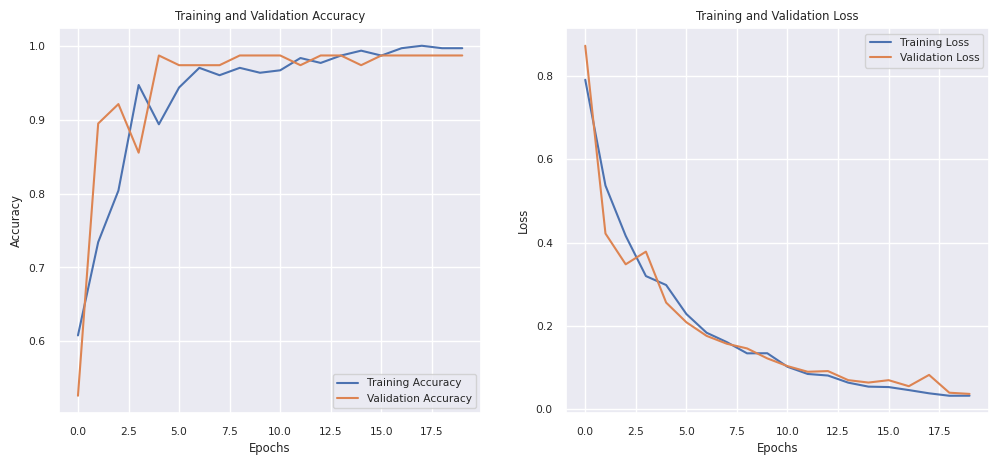

In [123]:
# Plotting training and validation accuracy
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


6/6 [==============================] - 0s 3ms/step


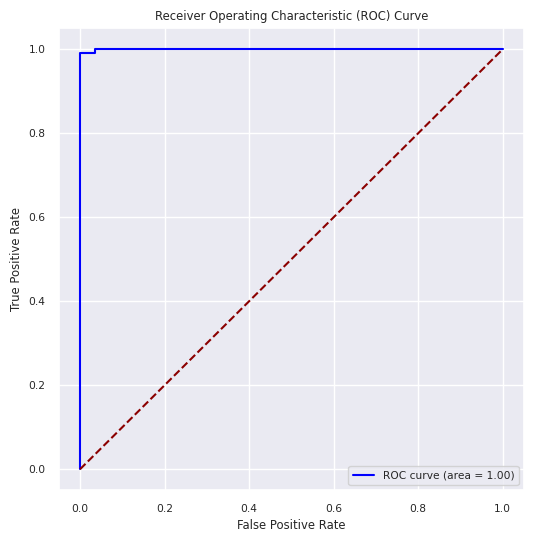

In [124]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities
y_pred_probs = model.predict(X_test_encoded).ravel()

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='darkred', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


#Ensemble Model (RANDOM FOREST + DEEP NEURAL NETWORK)

Epoch 1/20
27/27 [==============================] - 1s 9ms/step - loss: 0.8156 - accuracy: 0.5894 - val_loss: 1.7447 - val_accuracy: 0.4561
Epoch 2/20
27/27 [==============================] - 0s 4ms/step - loss: 0.4506 - accuracy: 0.7909 - val_loss: 1.1189 - val_accuracy: 0.4649
Epoch 3/20
27/27 [==============================] - 0s 3ms/step - loss: 0.2859 - accuracy: 0.9163 - val_loss: 0.7597 - val_accuracy: 0.5263
Epoch 4/20
27/27 [==============================] - 0s 3ms/step - loss: 0.2304 - accuracy: 0.9316 - val_loss: 0.6740 - val_accuracy: 0.6579
Epoch 5/20
27/27 [==============================] - 0s 3ms/step - loss: 0.1791 - accuracy: 0.9544 - val_loss: 0.5326 - val_accuracy: 0.7632
Epoch 6/20
27/27 [==============================] - 0s 3ms/step - loss: 0.2080 - accuracy: 0.9392 - val_loss: 0.4214 - val_accuracy: 0.8860
Epoch 7/20
27/27 [==============================] - 0s 3ms/step - loss: 0.1554 - accuracy: 0.9506 - val_loss: 0.3513 - val_accuracy: 0.9123
Epoch 8/20
27/27 [==

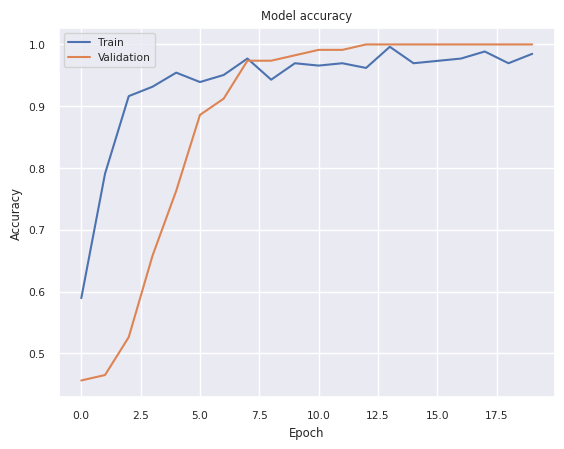

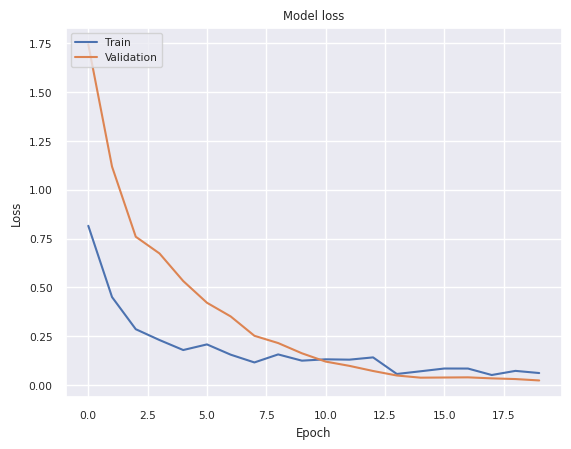

6/6 [==============================] - 0s 2ms/step

Confusion Matrix:
[[ 55   0]
 [  0 107]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00       107

    accuracy                           1.00       162
   macro avg       1.00      1.00      1.00       162
weighted avg       1.00      1.00      1.00       162



In [125]:
# Convert the features to float32
X_train_encoded = X_train_encoded.astype('float32')
X_test_encoded = X_test_encoded.astype('float32')

# Define the neural network model
nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_encoded.shape[1],)),
    BatchNormalization(),
    Dense(64, activation='relu', input_shape=(X_train_encoded.shape[1],)),
    BatchNormalization(),
    Dense(1, activation='sigmoid')
])

# Customizing the Adam optimizer with adjustable settings
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0003, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

# Compile the neural network model
nn_model.compile(optimizer=adam_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the neural network model
nn_history = nn_model.fit(X_train_encoded, y_train, epochs=20, batch_size=10, validation_split=0.3, verbose=1)

# Evaluate the model on training and testing data
train_loss, train_accuracy = nn_model.evaluate(X_train_encoded, y_train, verbose=0)
test_loss, test_accuracy = nn_model.evaluate(X_test_encoded, y_test, verbose=0)

# Print the accuracies
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")
print(f"Testing Accuracy (Percentage): {test_accuracy * 100:.2f}%")

# Plot training & validation accuracy values
plt.plot(nn_history.history['accuracy'])
plt.plot(nn_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(nn_history.history['loss'])
plt.plot(nn_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Generate predictions from the neural network model
nn_train_preds = nn_model.predict(X_train_encoded)
nn_test_preds = nn_model.predict(X_test_encoded)

# Here we are training Random Forest model using the predictions from the neural network as an additional feature
rf_model = RandomForestClassifier(n_estimators=100)
# Extend your feature set with predictions from the neural network
X_train_with_preds = np.hstack((X_train_encoded, nn_train_preds))
X_test_with_preds = np.hstack((X_test_encoded, nn_test_preds))

# Train the Random Forest model
rf_model.fit(X_train_with_preds, y_train)

# Predict using the Random Forest model
rf_predictions = rf_model.predict(X_test_with_preds)

# Evaluate the ensemble
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, rf_predictions))
print("\nClassification Report:")
print(classification_report(y_test, rf_predictions))



#Ensemble Model (Cross validation check)

In [128]:
# Set up K-fold cross-validation
kfold = StratifiedKFold(n_splits=8, shuffle=True, random_state=42)

def create_nn_model(input_shape):
    nn_model = Sequential([
        Dense(128, activation='relu', input_shape=(input_shape,)),
        BatchNormalization(),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dense(1, activation='sigmoid')
    ])
    nn_model.compile(optimizer=Adam(learning_rate=0.0003),
                     loss='binary_crossentropy',
                     metrics=['accuracy'])
    return nn_model

nn_acc_per_fold = []
nn_loss_per_fold = []
rf_acc_per_fold = []
rf_loss_per_fold = []

# Execute K-fold cross-validation
for train, test in kfold.split(X_train_encoded, y_train):
    # Create and train Neural Network model
    nn_model = create_nn_model(X_train_encoded.shape[1])
    nn_history = nn_model.fit(X_train_encoded.iloc[train], y_train.iloc[train],
                              epochs=20, batch_size=10, verbose=0)

    # Evaluate Neural Network
    nn_scores = nn_model.evaluate(X_train_encoded.iloc[test], y_train.iloc[test], verbose=0)
    nn_acc_per_fold.append(nn_scores[1] * 100)
    nn_loss_per_fold.append(nn_scores[0])

    # Generate Neural Network predictions for training and testing folds
    nn_train_preds = nn_model.predict(X_train_encoded.iloc[train]).round()
    nn_test_preds = nn_model.predict(X_train_encoded.iloc[test]).round()

    # Prepare features for Random Forest
    X_train_rf = np.hstack((X_train_encoded.iloc[train], nn_train_preds))
    X_test_rf = np.hstack((X_train_encoded.iloc[test], nn_test_preds))

    # Train and evaluate Random Forest
    rf_model = RandomForestClassifier(n_estimators=100)
    rf_model.fit(X_train_rf, y_train.iloc[train])
    rf_predictions = rf_model.predict(X_test_rf)
    rf_accuracy = accuracy_score(y_train.iloc[test], rf_predictions)
    rf_acc_per_fold.append(rf_accuracy * 100)

    # Print confusion matrix and classification report
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_train.iloc[test], rf_predictions))
    print("\nClassification Report:")
    print(classification_report(y_train.iloc[test], rf_predictions))

# Print average scores from all folds
print('------------------------------------------------------------------------')
print(f'Average Neural Network Accuracy: {np.mean(nn_acc_per_fold):.2f}% (+- {np.std(nn_acc_per_fold):.2f})')
print(f'Average Neural Network Loss: {np.mean(nn_loss_per_fold):.2f}')
print(f'Average Random Forest Accuracy: {np.mean(rf_acc_per_fold):.2f}% (+- {np.std(rf_acc_per_fold):.2f})')
print('------------------------------------------------------------------------')




2/2 [==============================] - 0s 5ms/step

Confusion Matrix:
[[20  0]
 [ 0 28]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        28

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48

2/2 [==============================] - 0s 6ms/step

Confusion Matrix:
[[19  0]
 [ 0 28]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        28

    accuracy                           1.00        47
   macro avg       1.00      1.00      1.00        47
weighted avg       1.00      1.00      1.00        47

2/2 [==============================] - 0s 4ms/step

Confusion Matrix:
[[19  0]
 [ 0 28]]

Classification Report:
       